<a href="https://colab.research.google.com/github/zevanathania/Zeva-Nathania/blob/main/penyu_ancol_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Objective

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', encoding='ISO-8859-1')
data

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
...,...,...,...,...,...,...,...,...,...
48199,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00
48200,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00
48201,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00


In [ ]:
data_duplicate = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
for column in data.columns:
    unique_values = data[column].nunique()
    if unique_values < 20:
      print(f"Column: {column} - Unique values: {unique_values}")
      print(data[column].unique())
      print("/n")

Column: holiday - Unique values: 11
[nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
/n
Column: snow_1h - Unique values: 12
[0.   0.51 0.32 0.06 0.05 0.21 0.25 0.44 0.13 0.1  0.17 0.08]
/n
Column: weather_main - Unique values: 11
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
/n


In [ ]:
len(data.weather_description.unique())

38

In [ ]:
data.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
def categorize_weather(value):
    if 'Clear' in value:
        return 'Clear'
    elif 'Clouds' in value:
        return 'Cloudy'
    elif 'Rain' in value:
        return 'Rainy'
    elif 'Snow' in value:
        return 'Snowy'
    elif 'Thunderstorm' in value:
        return 'Thunderstorms'
    elif 'Drizzle' in value:
        return 'Drizzle'
    elif 'Mist' in value:
        return 'Mist'
    elif 'Smoke' in value:
        return 'Smoke'
    elif 'Haze' in value:
        return 'Haze'
    elif 'Fog' in value:
        return 'Fog'
    elif 'Dust' in value:
        return 'Dust'
    elif 'Sand' in value:
        return 'Sand'
    elif 'Ash' in value:
        return 'Ash'
    elif 'Squall' in value:
        return 'Squall'
    else:
        return 'Other'

data['display'] = data['weather_description'].apply(categorize_weather)

In [ ]:
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,Other
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,Other
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,Other
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,Other
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,Other


In [ ]:
len(data.display.unique())

2

### MCAR

In [ ]:
import numpy as np
missing_percentage = 0.05
n_missing = int(np.floor(missing_percentage * data.size))
np.random.seed(100)
missing_indices = (np.random.randint(0, data.shape[0], n_missing),
                   np.random.randint(0, data.shape[1], n_missing))

In [ ]:
data_mcar = data.copy()

In [ ]:
for i, j in zip(missing_indices[0], missing_indices[1]):
  data_mcar.iloc[i, j] = np.nan

In [ ]:
data_mcar.isnull().sum()

,0
traffic_volume,2360
holiday,48144
temp,2301
rain_1h,2364
snow_1h,2380
clouds_all,2321
weather_main,2314
weather_description,2322
date_time,2449
display,2358


In [ ]:
data_mcar.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
0,5545.0,NaN,288.28,0.0,0.0,NaN,Clouds,scattered clouds,02-10-2012 09:00,Other
1,NaN,NaN,289.36,0.0,0.0,75.0,Clouds,broken clouds,NaN,Other
2,4767.0,NaN,289.58,0.0,0.0,90.0,Clouds,overcast clouds,02-10-2012 11:00,Other
3,5026.0,NaN,290.13,0.0,0.0,90.0,Clouds,overcast clouds,02-10-2012 12:00,Other
4,4918.0,NaN,NaN,0.0,0.0,75.0,Clouds,broken clouds,02-10-2012 13:00,Other


In [ ]:
data_mcar[data_mcar['holiday'].isnull()]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
0,5545.0,NaN,288.28,0.0,0.0,NaN,Clouds,scattered clouds,02-10-2012 09:00,Other
1,NaN,NaN,289.36,0.0,0.0,75.0,Clouds,broken clouds,NaN,Other
2,4767.0,NaN,289.58,0.0,0.0,90.0,Clouds,overcast clouds,02-10-2012 11:00,Other
3,5026.0,NaN,290.13,0.0,0.0,90.0,Clouds,overcast clouds,02-10-2012 12:00,Other
4,4918.0,NaN,NaN,0.0,0.0,75.0,Clouds,broken clouds,02-10-2012 13:00,Other
...,...,...,...,...,...,...,...,...,...,...
48199,3543.0,NaN,283.45,0.0,0.0,75.0,Clouds,broken clouds,30-09-2018 19:00,Other
48200,2781.0,NaN,282.76,0.0,NaN,90.0,NaN,NaN,30-09-2018 20:00,Other
48201,2159.0,NaN,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,NaN
48202,1450.0,NaN,NaN,0.0,0.0,90.0,Clouds,overcast clouds,30-09-2018 22:00,Other


In [ ]:
data_mcar['traffic_volume'].fillna(data_mcar['traffic_volume'].median(),inplace=True)

<ipython-input-22-f41fc8d0363e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mcar['traffic_volume'].fillna(data_mcar['traffic_volume'].median(),inplace=True)


In [ ]:
data_mcar['holiday'].fillna(data_mcar['holiday'].mode(),inplace=True)

<ipython-input-23-e0ac445a7a8b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mcar['holiday'].fillna(data_mcar['holiday'].mode(),inplace=True)


In [ ]:
data_cleaned = data_mcar.dropna()

In [ ]:
len(data_cleaned)

45

### MAR

In [ ]:
data_mar = data.copy()

In [ ]:
mar_indices = list(data_mar.loc[data_mar['holiday'] == 'No hari prei'].index)

In [ ]:
for i in mar_indices:
  data_mar.iloc[i,10] = np.nan

In [ ]:
data_mar.isnull().sum()

,0
traffic_volume,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
display,0


In [ ]:
data_mar[data_mar['holiday'].isnull()].sample(10)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
12113,552,NaN,257.340,0.0,0.0,40,Clouds,scattered clouds,09-02-2014 02:00,Other
26600,6304,NaN,280.190,0.0,0.0,1,Clear,sky is clear,14-09-2016 07:00,Other
716,953,NaN,271.060,0.0,0.0,20,Clouds,few clouds,28-10-2012 07:00,Other
12593,1616,NaN,259.890,0.0,0.0,90,Clouds,overcast clouds,28-02-2014 23:00,Other
19635,449,NaN,270.220,0.0,0.0,90,Clouds,overcast clouds,23-11-2015 00:00,Other
1030,5906,NaN,275.890,0.0,0.0,1,Clear,sky is clear,09-11-2012 08:00,Other
27428,3093,NaN,285.584,0.0,0.0,0,Clear,Sky is Clear,18-10-2016 19:00,Clear
45723,2203,NaN,296.890,0.0,0.0,20,Clouds,few clouds,10-07-2018 22:00,Other
30779,1130,NaN,265.690,0.0,0.0,75,Clouds,broken clouds,05-02-2017 07:00,Other
11428,4045,NaN,270.770,0.0,0.0,64,Clouds,broken clouds,13-01-2014 10:00,Other


In [ ]:
data_mar[data_mar['holiday'].isnull()]['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
data_mar.loc[data_mar['weather_description'].isnull()]['holiday'].unique()

array([], dtype=object)

In [ ]:
data_mar['weather_description'].fillna('cuaca hari ini',inplace=True)

<ipython-input-33-b77e9257f4e0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mar['weather_description'].fillna('cuaca hari ini',inplace=True)


In [ ]:
len(data_mar)

48204

### MNAR

In [ ]:
data_mnar = data.copy()

In [ ]:
data_mnar.loc[10, 'weather_description'] = np.nan

In [ ]:
data_mnar[data_mnar['weather_description'].isnull()]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
10,3539,NaN,290.97,0.0,0.0,20,Clouds,NaN,02-10-2012 19:00,Other


In [ ]:
data_mnar.dropna(inplace=True)

In [ ]:
len(data_mnar)

61

###FEATURE SCALLING

In [ ]:
skew_scores = {}
for column in data.select_dtypes(include=[np.number]).columns:
    skew_score = data[column].skew()
    skew_scores[column] = skew_score

In [ ]:
skew_scores

{'traffic_volume': -0.08938135143647916,
 'temp': -2.2472259855040755,
 'rain_1h': 219.3890357717216,
 'snow_1h': 48.36748425372157,
 'clouds_all': -0.1972567027959649}

In [ ]:
kurt_scores = {}
for column in data.select_dtypes(include=[np.number]).columns:
    kurt_score = data[column].kurt()
    kurt_scores[column] = kurt_score

In [ ]:
kurt_scores

{'traffic_volume': -1.3090882117269556,
 'temp': 39.915068254308295,
 'rain_1h': 48155.626806800516,
 'snow_1h': 2620.465829444374,
 'clouds_all': -1.7422655046406021}

<Axes: ylabel='Frequency'>

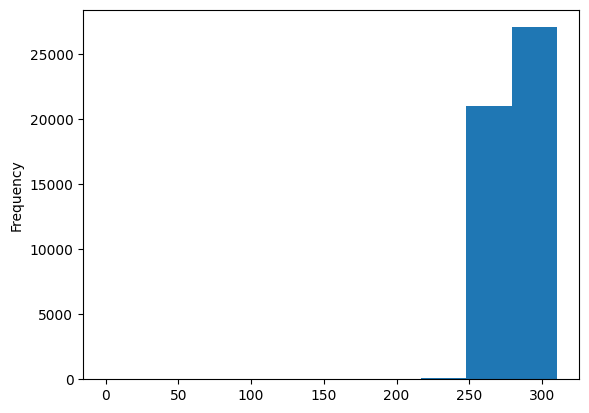

In [ ]:
data['temp'].plot(kind='hist')

<Axes: ylabel='Density'>

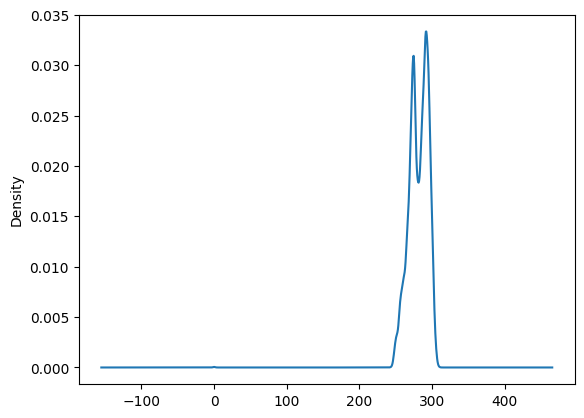

In [ ]:
data['temp'].plot(kind='density')

<Axes: ylabel='Frequency'>

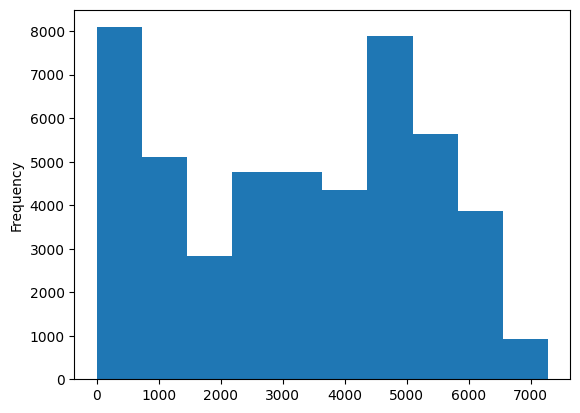

In [ ]:
data['traffic_volume'].plot(kind='hist')

<Axes: ylabel='Density'>

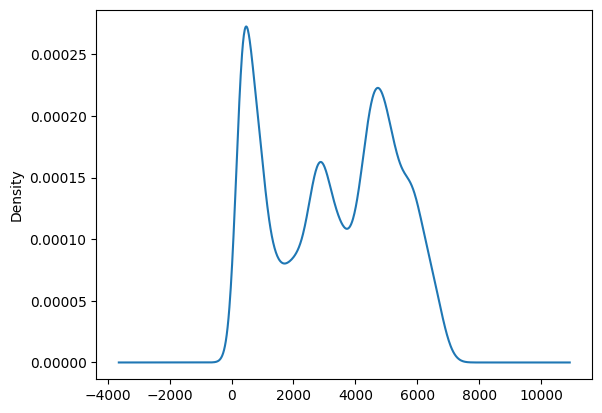

In [ ]:
data['traffic_volume'].plot(kind='density')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_scaled = scaler.fit_transform(data[['temp']])

In [ ]:
data_scaled = pd.DataFrame(data_scaled,columns=['temp'])

In [ ]:
data_scaled

,temp
0,0.929726
1,0.933209
2,0.933918
3,0.935692
4,0.938949
...,...
48199,0.914148
48200,0.911923
48201,0.911826
48202,0.909762


<Axes: ylabel='Frequency'>

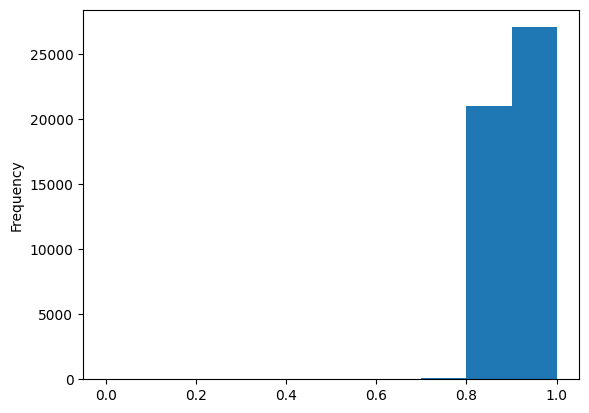

In [ ]:
data_scaled['temp'].plot(kind='hist')

In [ ]:
data['temp']

,temp
0,288.28
1,289.36
2,289.58
3,290.13
4,291.14
...,...
48199,283.45
48200,282.76
48201,282.73
48202,282.09


<Axes: ylabel='Frequency'>

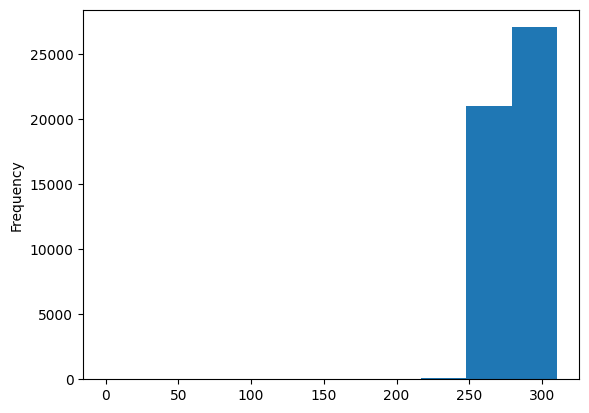

In [ ]:
data['temp'].plot(kind='hist')

###HANDLING OUTLIERS

In [ ]:
pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
from feature_engine.outliers import Winsorizer,OutlierTrimmer

In [ ]:
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['traffic_volume'])

In [ ]:
data_winsor = winsor.fit_transform(data)

In [ ]:
data_winsor['traffic_volume'].skew()

-0.08938135143647916

In [ ]:
data['traffic_volume'].skew()

-0.08938135143647916

In [ ]:
winsor = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['temp'])

In [ ]:
data_gaussian = winsor.fit_transform(data)

In [ ]:
data_gaussian['temp'].skew()

-0.36763240054848206

In [ ]:
data_gaussian['temp'].kurt()

-0.6482001527969254

<Axes: ylabel='Frequency'>

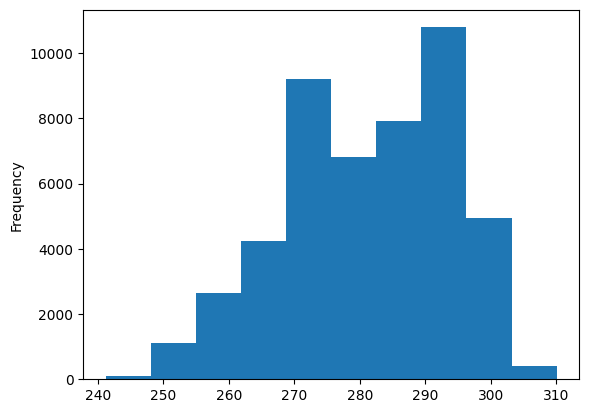

In [ ]:
data_gaussian['temp'].plot(kind='hist')

<Axes: ylabel='Frequency'>

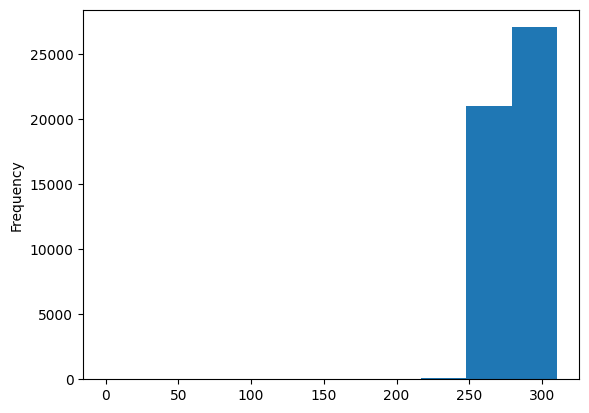

In [ ]:
data['temp'].plot(kind='hist')

In [ ]:
data['temp'].skew()

-2.2472259855040755

In [ ]:
data['temp'].kurt()

39.915068254308295

In [ ]:
trimmer = OutlierTrimmer(capping_method='iqr', tail='both', fold=3,variables=['traffic_volume'])

In [ ]:
data_trim = trimmer.fit_transform(data)

In [ ]:
len(data_trim)

48204

In [ ]:
len(data)

48204

###ENCODING

In [ ]:
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,Other
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,Other
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,Other
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,Other
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,Other


In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
data_encode = encoder.fit_transform(data[['weather_main']])

In [ ]:
data_encode = pd.DataFrame(data_encode,columns=encoder.get_feature_names_out())

In [ ]:
data_encode.head()

,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for column in data.columns:
    unique_values = data[column].nunique()
    if unique_values< 20:
        print(f"Column: {column} - Unique values: {unique_values}")
        print(data[column].unique())
        print("\n")

Column: holiday - Unique values: 11
[nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


Column: snow_1h - Unique values: 12
[0.   0.51 0.32 0.06 0.05 0.21 0.25 0.44 0.13 0.1  0.17 0.08]


Column: weather_main - Unique values: 11
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


Column: display - Unique values: 2
['Other' 'Clear']




In [ ]:
ord_encoder = OrdinalEncoder(categories=[['Clouds','Clear','Rain','Drizzle','Mist','Haze','Fog','Thunderstorm','Snow','Squall','Smoke'],
                                        ['Other','Clear']])

In [ ]:
ord_data = ord_encoder.fit_transform(data[['weather_main','display']])

In [ ]:
ord_data = pd.DataFrame(ord_data,columns=['weather_main','display'])

In [ ]:
ord_data.head()

,weather_main,display
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


###FEATURE SELECTION

In [ ]:
data.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'display'],
      dtype='object')

In [ ]:
data[['temp','traffic_volume']].corr()

,temp,traffic_volume
temp,1.000000,0.130299
traffic_volume,0.130299,1.000000


In [ ]:
import seaborn as sns

<Axes: >

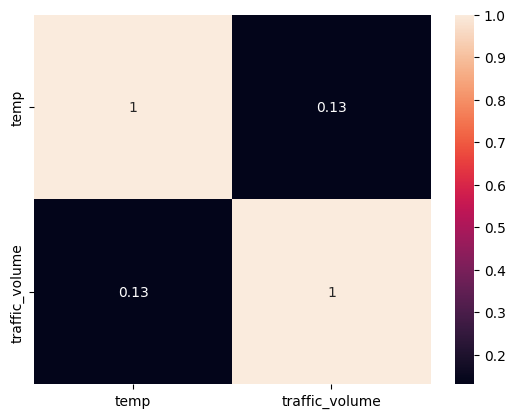

In [ ]:
sns.heatmap(data[['temp','traffic_volume']].corr(),annot=True)

In [ ]:
from scipy.stats import kendalltau,spearmanr,chi2_contingency

In [ ]:
contingency_table = pd.crosstab(data['weather_main'],data['display'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
chi2

4653.769592289842

In [ ]:
p

0.0

In [ ]:
p < 0.05

True

### asumsi variabel ordinal

In [ ]:
kendalltau(data['weather_main'],data['display'])

SignificanceResult(statistic=0.22169500092929093, pvalue=0.0)

In [ ]:
spearmanr(data['weather_main'],data['display'])

SignificanceResult(statistic=0.24815219150839662, pvalue=0.0)

korelasi categorical dengan numerik

In [ ]:
spearmanr(data['temp'],data['traffic_volume'])

SignificanceResult(statistic=0.13287367834492628, pvalue=9.719743041566796e-189)

### TRAIN TEST TRIAL

In [ ]:
data.temp.unique()

array([288.28, 289.36, 289.58, ..., 306.08, 304.41, 304.9 ])

In [ ]:
data['temp_reduced'] = data['temp'].astype(str).str[0]

print(data[['temp', 'temp_reduced']].head())
print('Number of categories in the variable temp: {}'.format(len(data.temp.unique()))) # Added parentheses to call the unique() method and get the number of unique values.
print('Number of categories in the variable temp reduced: {}'.format(len(data.temp_reduced.unique())))

     temp temp_reduced
0  288.28            2
1  289.36            2
2  289.58            2
3  290.13            2
4  291.14            2
Number of categories in the variable temp: 5843
Number of categories in the variable temp reduced: 3


In [ ]:
data

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display,temp_reduced
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,Other,2
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,Other,2
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,Other,2
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,Other,2
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,Other,2
...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,Other,2
48200,2781,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,Other,2
48201,2159,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,Other,2
48202,1450,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,Other,2


In [ ]:
data_without_reduced_temp = data.drop('temp_reduced', axis=1)
data_with_reduced_temp = data.drop('temp', axis=1)

In [ ]:
data_without_reduced_temp.head(5)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,Other
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,Other
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,Other
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,Other
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,Other


In [ ]:
data_with_reduced_temp.head(5)

,traffic_volume,holiday,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,display,temp_reduced
0,5545,NaN,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,Other,2
1,4516,NaN,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,Other,2
2,4767,NaN,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,Other,2
3,5026,NaN,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,Other,2
4,4918,NaN,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,Other,2


In [ ]:
use_cols = ['temp', 'traffic_volume']
X_train_without_reduced, X_test_without_reduced, y_train_without_reduced, y_test_without_reduced = train_test_split(data[use_cols], data['temp'], test_size=0.3, random_state=0)

## For data with reduced cabins
use_cols = ['temp', 'traffic_volume']
X_train_with_reduced, X_test_with_reduced, y_train_with_reduced, y_test_with_reduced = train_test_split(data[use_cols], data['temp'], test_size=0.3, random_state=0)

## Show shapes
X_train_without_reduced.shape, X_test_without_reduced.shape

((33742, 2), (14462, 2))

In [ ]:
unique_to_train_set = [x for x in X_train_without_reduced['temp'].unique() if x not in X_test_without_reduced['temp'].unique()]
unique_to_test_set = [x for x in X_test_without_reduced['temp'].unique() if x not in X_train_without_reduced['temp'].unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  1244
Total unique_to_test_set  :  297


**there are 1244 temps only present in the training set and are 297 temps left that only present in the test set, yet aint in the train set**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

X_train_without_reduced = ohe.fit_transform(X_train_without_reduced)
X_test_without_reduced = ohe.transform(X_test_without_reduced)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe2 = OneHotEncoder(handle_unknown='ignore')

X_train_with_reduced = ohe2.fit_transform(X_train_with_reduced)
X_test_with_reduced = ohe2.transform(X_test_with_reduced)

In [ ]:
rf = RandomForestClassifier(n_estimators=5, random_state=2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
 9   display              48204 non-null  object 
 10  temp_reduced         48204 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.0+ MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['traffic_volume', 'temp']], data['holiday'], test_size=0.3, random_state=0)

print('Size Train Set : ', X_train.shape)
print('Size Test Set  : ', X_test.shape)
X_train

Size Train Set :  (33742, 2)
Size Test Set  :  (14462, 2)


,traffic_volume,temp
40713,4602,256.93
42860,2159,271.69
33632,4619,291.68
31538,4711,285.40
11108,942,254.15
...,...,...
21243,5858,260.48
45891,935,291.08
42613,4447,277.08
43567,341,276.88


In [ ]:
print('Distribution of column `traffic_volume`  : ', X_train['traffic_volume'].skew())
print('Distribution of column `temp` : ', X_train['temp'].skew())

Distribution of column `traffic_volume`  :  -0.09082139015527797
Distribution of column `temp` :  -2.2615528431047576


both skewed

In [ ]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


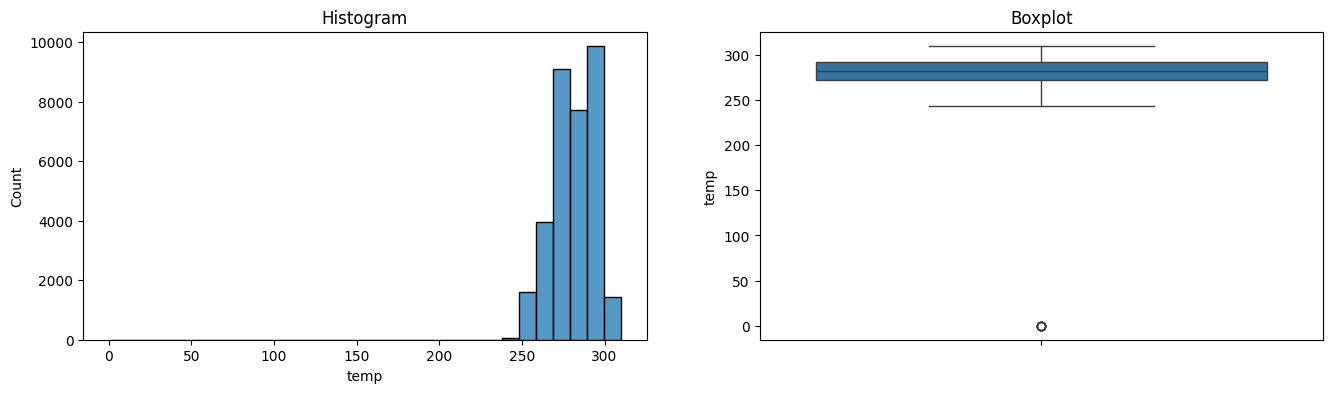

In [ ]:
diagnostic_plots(X_train, 'temp')

In [ ]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary_traffic_volume, lower_boundary_traffic_volume = find_normal_boundaries(X_train, 'traffic_volume')
upper_boundary_traffic_volume, lower_boundary_traffic_volume

(9227.598724232623, -2701.1709487599182)

upper boundary is 9227

In [ ]:
print('Total traffic volume              : {}'.format(len(X_train)))
print('Traffic volume than 9227          : {}'.format(len(X_train[X_train['traffic_volume'] > upper_boundary_traffic_volume])))
print('')
print('% of total traffic more than 9227 : {}'.format(len(X_train[X_train['traffic_volume'] > upper_boundary_traffic_volume]) / len(X_train) * 100))

Total traffic volume              : 33742
Traffic volume than 9227          : 0

% of total traffic more than 9227 : 0.0


no traffic volume more than 9227

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary_temp, lower_boundary_temp = find_skewed_boundaries(X_train, 'temp', 3)
upper_boundary_temp, lower_boundary_temp

(350.5799999999999, 213.4500000000001)

In [ ]:
print('Total temp            : {}'.format(len(X_train)))
print('Temp more than 350    : {}'.format(len(X_train[X_train['temp'] > upper_boundary_temp])))
print('')
print('% temp more than 350  : {}'.format(len(X_train[X_train['temp'] > upper_boundary_temp])/len(X_train) * 100))

Total temp            : 33742
Temp more than 350    : 0

% temp more than 350  : 0.0


lower boundary is positive, so we used both upper and lower to determine the outliers.

In [ ]:
# Flag the outliers in category `Age`
outliers_traffic_volume = np.where(X_train['traffic_volume'] > upper_boundary_traffic_volume, True,
                       np.where(X_train['traffic_volume'] < lower_boundary_traffic_volume, True, False))

# Flag the outliers in category `Fare`
outliers_temp = np.where(X_train['temp'] > upper_boundary_temp, True,
                       np.where(X_train['temp'] < lower_boundary_temp, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_traffic_volume + outliers_temp)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (33742, 2)
Size dataset - After trimming  :  (33735, 2)


In [ ]:
!pip install feature-engine

In [ ]:
from feature_engine.outliers import Winsorizer

winsoriser_traffic_volume = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['traffic_volume'],
                            missing_values='ignore')

X_train_capped = winsoriser_traffic_volume.fit_transform(X_train)
X_test_capped = winsoriser_traffic_volume.transform(X_test)

In [ ]:
from feature_engine.outliers import Winsorizer

winsoriser_temp = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['temp'])

X_train_capped = winsoriser_temp.fit_transform(X_train_capped)
X_test_capped = winsoriser_temp.transform(X_test_capped)

traffic_volume - Before Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


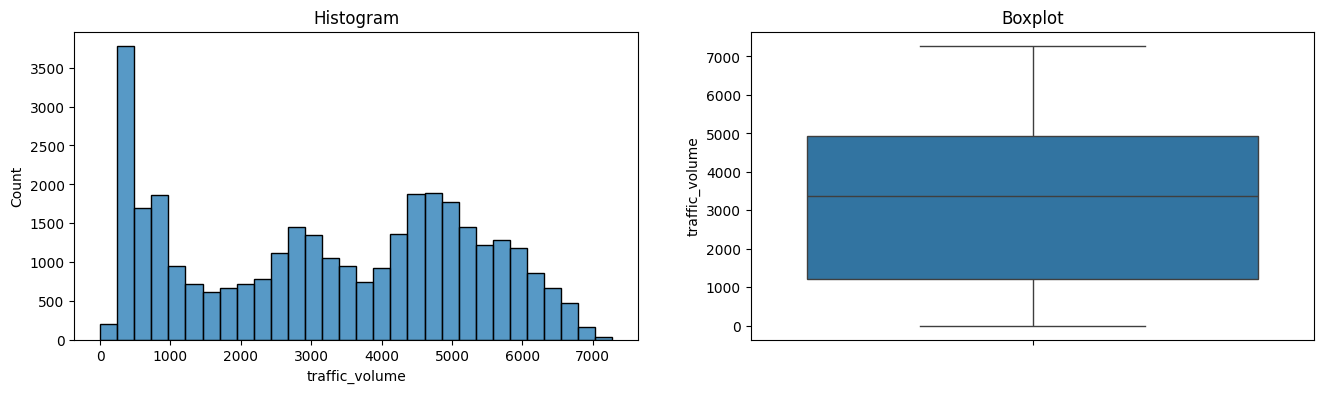


traffic_volume - After Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


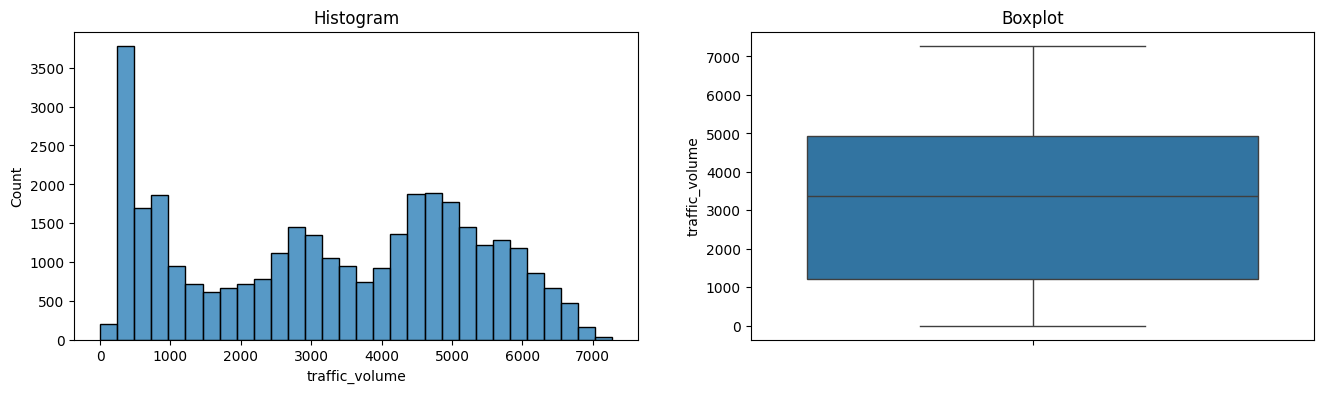


temp - Before Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


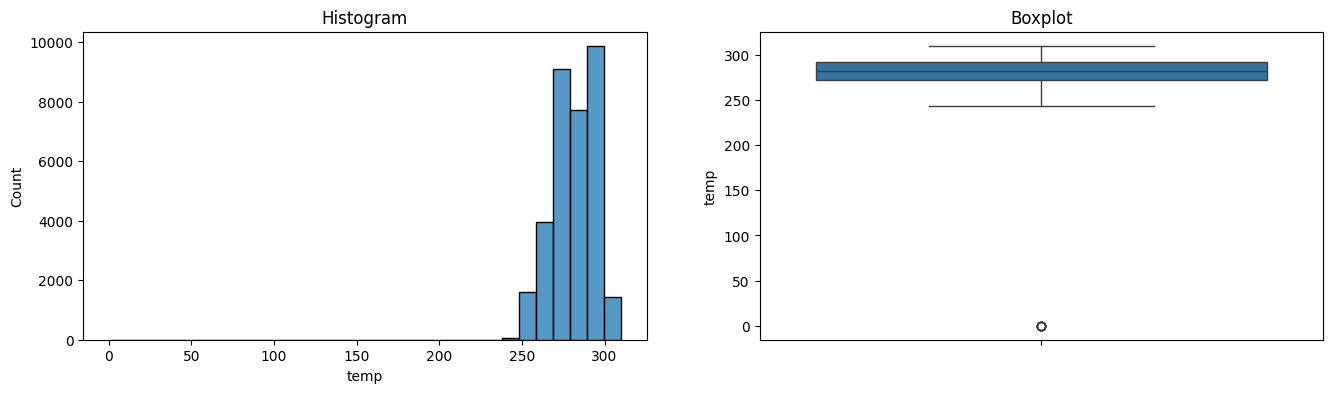


temp - After Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


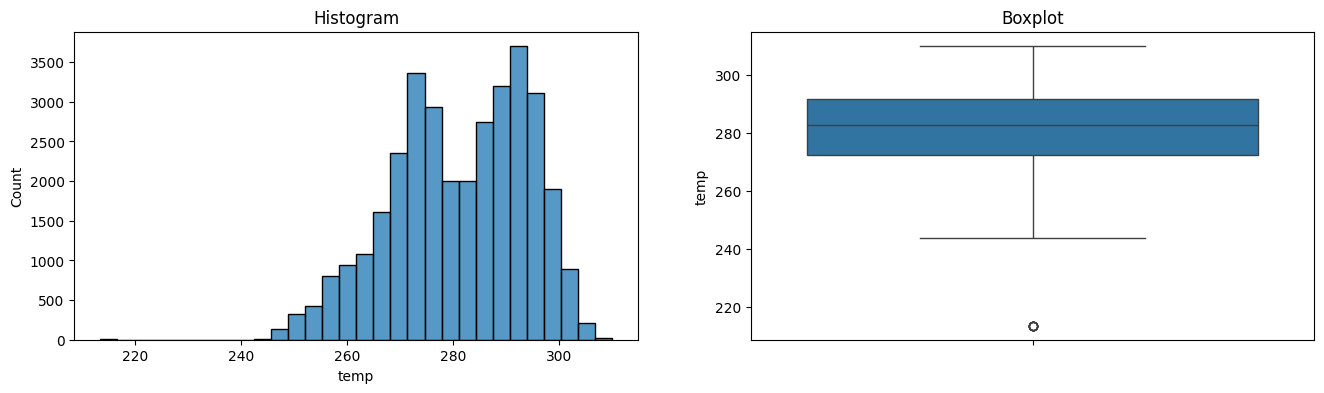

In [ ]:
print('traffic_volume - Before Capping')
diagnostic_plots(X_train, 'traffic_volume')

print('\ntraffic_volume - After Capping')
diagnostic_plots(X_train_capped, 'traffic_volume')

print('\ntemp - Before Capping')
diagnostic_plots(X_train, 'temp')

print('\ntemp - After Capping')
diagnostic_plots(X_train_capped, 'temp')

###LINEAR REGRESSION